In [1]:
import array
from array import array
import matplotlib.pyplot as plt
import os

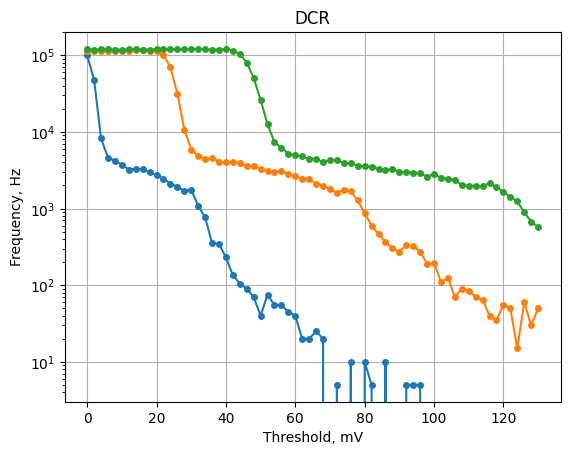

In [2]:
##Draw DCR staircase for SIPM

##set up the correct directory name with data
#pathIn = "C:\Users\Nuclab\Desktop\dataLab7\SIPM"
pathIn = "C:/Users/Nuclab/Desktop/Ускорители/5.1_1.7"
# pathIn = "/home/ovtin/Dropbox/NSU/AcceleratorPhysics/NuclearLabs/Lab7/dataLab7/SIPM"
# pathIn = "C:\Users\Nuclab\Desktop\Ускорители\5.1_1.7"

##set up the correct file name with data
fileName1 = "5.1_40dB_staircase.txt"
fileName2 = "5.1_45dB_staircase.txt"
fileName3 = "5.1_48dB_staircase.txt"

listFiles = [fileName1,fileName2,fileName3] 

pathOut = pathIn + '/' + 'results'
outFile = 'DCR_sipm.png'
if not os.path.exists(pathOut):
    os.mkdir(pathOut)
    
for fileName in listFiles:
    try:
        file = open(pathIn + "/" + fileName)
        trhU, freq = array( 'd' ), array( 'd' )
        for line in file.readlines():
            line = line.replace(',','.')
            b = line.split()
            trhU.append(float(b[0]))
            freq.append(float(b[1]))
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')    
    
    plt.plot(trhU,freq, 'o', ls='-', ms=4)

plt.grid(True)
plt.yscale('log')
plt.xlabel('Threshold, mV')
plt.ylabel('Frequency, Hz')
plt.title('DCR')

plt.savefig(pathOut + '/' + outFile)
plt.show()

In [3]:
##calculate optical cross-talk

#set selected work gain for SiPM
db = '45'
#fileWorkG = "sipm_DCR_55,87V_" + db + "dB_staircase.txt"
fileWorkG = fileName2

trh1 = 10.  #Set up threshold at 0.5 photoelectron peak
trh2 = 50.  #Set up threshold at 1.5 photoelectron peak

file = open(pathIn + "/" + fileWorkG)
trhU, freq = array( 'd' ), array( 'd' )
for line in file.readlines():
    line = line.replace(',','.')
    b = line.split()
    if trh1 == float(b[0]):
        DCR1 = float(b[1])   
        print('For 0.5 x single photo-electrons Freq =',DCR1,'Hz')
    if trh2 == float(b[0]):
        DCR2 = float(b[1])  
        print('For 1.5 x single photo-electrons Freq =',DCR2,'Hz')

OXT = (DCR2/DCR1)*100.
print('OXT=',OXT)

For 0.5 x single photo-electrons Freq = 114670.0 Hz
For 1.5 x single photo-electrons Freq = 3245.0 Hz
OXT= 2.8298595971047353
